In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv("dataset/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
def value_to_float(x):
    # Convert the string feature into float/Integer
    #If there is 'K' or 'M' in the string, convert it to the corresponding number (1000 or 1000000)
    
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 10**3
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 10**6
        return 1000000.0
    
    # If the string cannot be converted, return 0 instead
    try:
        parsed_val = float(x)
    except ValueError:
        parsed_val = 0.0
    return parsed_val

In [8]:
df = df.loc[df["Rating"].notnull()]
df = df.loc[df["Rating"] <= 5]

df["Price"] = df["Price"].apply(lambda x: x.replace('$', ''))
df["Installs"] = df["Installs"].apply(lambda x: x.replace('+', ''))
df['Installs'] = df['Installs'].apply(lambda a: str(a).replace(',', '') if ',' in str(a) else a)
df['Installs'] = df['Installs'].apply(lambda a : int(a))
df['Reviews'] = df['Reviews'].apply(lambda a : int(a))

genres = df["Genres"].value_counts().head().index

str_cols = ["Size", "Price"]

for col in str_cols:
    df[[col]] = df[[col]].fillna(value="")
    df[col] = df[col].apply(value_to_float)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
df.shape

(9360, 13)

In [12]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9360.000000,9.360000e+03,9.360000e+03,9.360000e+03,9360.000000
mean,4.191838,5.143767e+05,1.894124e+07,1.790875e+07,0.961279
std,0.515263,3.145023e+06,2.302813e+07,9.126637e+07,15.821640
min,1.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.867500e+02,2.400000e+06,1.000000e+04,0.000000
50%,4.300000,5.955000e+03,9.500000e+06,5.000000e+05,0.000000
75%,4.500000,8.162750e+04,2.700000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1023.8+ KB


In [14]:
# There are 7 records where Reviews are greater than Installs 
df[df['Reviews'] > df['Installs']].shape

(7, 13)

In [15]:
# Dropping 7 records that have greater Reviews than Installs
df.drop(df[df['Reviews'] > df['Installs']].index,inplace=True)
df[df['Reviews'] > df['Installs']].shape

(0, 13)

In [16]:
# Dropping rows that have Price > 200
df.drop(df[df['Price'] > 200].index,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9338 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9338 non-null   object 
 1   Category        9338 non-null   object 
 2   Rating          9338 non-null   float64
 3   Reviews         9338 non-null   int64  
 4   Size            9338 non-null   float64
 5   Installs        9338 non-null   int64  
 6   Type            9338 non-null   object 
 7   Price           9338 non-null   float64
 8   Content Rating  9338 non-null   object 
 9   Genres          9338 non-null   object 
 10  Last Updated    9338 non-null   object 
 11  Current Ver     9338 non-null   object 
 12  Android Ver     9338 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1021.3+ KB


In [18]:
df = df[df['Category'] != '1.9']
value_counts = df['Category'].value_counts()
print(value_counts)

Category
FAMILY                 1742
GAME                   1093
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 349
COMMUNICATION           328
SPORTS                  319
FINANCE                 317
PHOTOGRAPHY             317
PERSONALIZATION         312
LIFESTYLE               308
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  258
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64


In [19]:
category = pd.get_dummies(df['Category'], dtype='uint8')
df = pd.concat([df, category], axis=1)


In [20]:
df.drop('Category', axis=1, inplace=True)

In [21]:
df['Rating'].value_counts()

Rating
4.4    1107
4.3    1074
4.5    1037
4.2     951
4.6     823
4.1     705
4.0     565
4.7     499
3.9     386
3.8     299
5.0     268
3.7     239
4.8     233
3.6     172
3.5     162
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      44
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: count, dtype: int64

In [22]:
print(df['Content Rating'].value_counts())

Content Rating
Everyone           7394
Teen               1082
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: count, dtype: int64


In [23]:
df = df[df['Content Rating'] != 'Unrated']


In [24]:
content_rating = pd.get_dummies(df['Content Rating'], dtype='uint8')

df = pd.concat([df, content_rating], axis=1)

df.drop('Content Rating', axis=1, inplace=True)


In [25]:
df.head(6)

,App,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,...,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000000.0,10000,Free,0.0,Art & Design,"January 7, 2018",1.0.0,...,0,0,0,0,0,0,1,0,0,0
1,Coloring book moana,3.9,967,14000000.0,500000,Free,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,...,0,0,0,0,0,0,1,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700000.0,5000000,Free,0.0,Art & Design,"August 1, 2018",1.2.4,...,0,0,0,0,0,0,1,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25000000.0,50000000,Free,0.0,Art & Design,"June 8, 2018",Varies with device,...,0,0,0,0,0,0,0,0,0,1
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800000.0,100000,Free,0.0,Art & Design;Creativity,"June 20, 2018",1.1,...,0,0,0,0,0,0,1,0,0,0
5,Paper flowers instructions,4.4,167,5600000.0,50000,Free,0.0,Art & Design,"March 26, 2017",1.0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
# df = df.drop(['Last Updated', 'Current Ver', 'Android Ver','Type','App','Reviews', 'Installs','Genres'], axis=1)
df = df.drop(['Last Updated', 'Current Ver', 'Android Ver','Type','App','Genres'], axis=1)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9337 entries, 0 to 10840
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               9337 non-null   float64
 1   Reviews              9337 non-null   int64  
 2   Size                 9337 non-null   float64
 3   Installs             9337 non-null   int64  
 4   Price                9337 non-null   float64
 5   ART_AND_DESIGN       9337 non-null   uint8  
 6   AUTO_AND_VEHICLES    9337 non-null   uint8  
 7   BEAUTY               9337 non-null   uint8  
 8   BOOKS_AND_REFERENCE  9337 non-null   uint8  
 9   BUSINESS             9337 non-null   uint8  
 10  COMICS               9337 non-null   uint8  
 11  COMMUNICATION        9337 non-null   uint8  
 12  DATING               9337 non-null   uint8  
 13  EDUCATION            9337 non-null   uint8  
 14  ENTERTAINMENT        9337 non-null   uint8  
 15  EVENTS               9337 non-null   uint8

In [28]:
df = df[df['Size'] != 0]

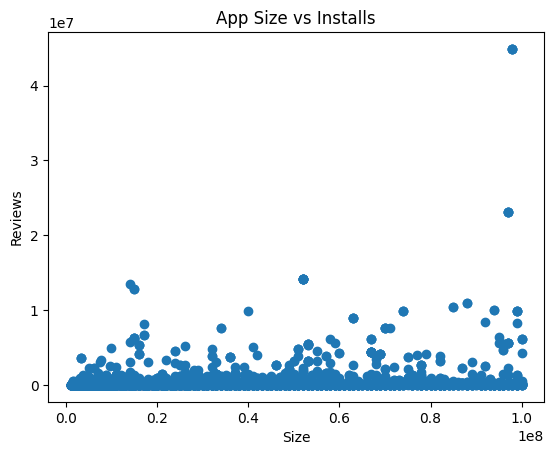

In [33]:
import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(df['Size'], df['Reviews'])

# set the x and y axis labels
plt.xlabel('Size')
plt.ylabel('Reviews')

# set the plot title
plt.title('App Size vs Installs')

# show the plot
plt.show()

In [32]:
df = df[df['Installs'] <= 0.4 * 1e9]

In [34]:
df = df[df['Reviews']<=2 * 1e7]

In [35]:
y = df[['Rating']]
x = df.drop('Rating',axis=1)

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7397 entries, 0 to 10840
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Reviews              7397 non-null   int64  
 1   Size                 7397 non-null   float64
 2   Installs             7397 non-null   int64  
 3   Price                7397 non-null   float64
 4   ART_AND_DESIGN       7397 non-null   uint8  
 5   AUTO_AND_VEHICLES    7397 non-null   uint8  
 6   BEAUTY               7397 non-null   uint8  
 7   BOOKS_AND_REFERENCE  7397 non-null   uint8  
 8   BUSINESS             7397 non-null   uint8  
 9   COMICS               7397 non-null   uint8  
 10  COMMUNICATION        7397 non-null   uint8  
 11  DATING               7397 non-null   uint8  
 12  EDUCATION            7397 non-null   uint8  
 13  ENTERTAINMENT        7397 non-null   uint8  
 14  EVENTS               7397 non-null   uint8  
 15  FAMILY               7397 non-null   uint8

In [37]:
x.shape, y.shape

((7397, 42), (7397, 1))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [39]:
import random
from deap import base, creator, tools, algorithms
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)


In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test data
Y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, Y_pred)
print("Mean squared error: ", mse)

Mean squared error:  0.2777167128621622


In [41]:
# Create a fitness function that measures the performance of the model
def evaluate(individual):
    # Convert the individual into a list of hyperparameters
    n_estimators = individual[0]
    max_depth = individual[1]
    max_features = individual[2]
    min_samples_split = individual[3]
    min_samples_leaf = individual[4]
    
    # Create a random forest model with the given hyperparameters
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,random_state=42)
    
    # Train the model on the training data
    rf.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    Y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, Y_pred)
    print(mse)
    # Return the mean squared error as the fitness value
    return mse,

In [42]:

# Define the genetic algorithm parameters
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox.register("attr_n_estimators", random.randint, 1, 1000)
toolbox.register("attr_max_depth", random.randint, 1, 50)
toolbox.register("attr_max_features", random.randint, 1, len(x.columns))
toolbox.register("attr_min_samples_split", random.randint, 2,50)
toolbox.register("attr_min_samples_leaf", random.randint, 1,50)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_n_estimators, toolbox.attr_max_depth, toolbox.attr_max_features, toolbox.attr_min_samples_split, toolbox.attr_min_samples_leaf), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=2, up=len(x.columns), indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm
population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=5)


0.25596613950037883
0.2593819007563113
0.25912751177367405
0.25346894812101567
0.2765813945930365
0.26351352356390384
0.2591031756482264
0.2690328250973167
0.25793185881219793
0.25594500381924457
0.25787804338904285
0.26364151117487505
0.2588177704302016
0.2636245145173169
0.2598319049068547
0.2606035683497275
0.2574062141126624
0.2622033720728791
0.2538519906116169
0.2798138099830993
0.2624358455901015
0.2592925074340282
0.2560226347188881
0.2582519798509477
0.2568717159651918
0.2567246966169239
0.25688360344624034
0.2661114152248766
0.2583276956564993
0.25701194246737447
0.2702098948067474
0.2579433682920081
0.2554038467626306
0.2507642934113945
0.2581292666534824
0.2525801199610961
0.25832654631450974
0.25805506753204077
0.25959386349770264
0.27111100099335395
0.2590319128675398
0.2701412215387374
0.2607822931007001
0.2602068820819347
0.2546637826323551
0.2509916709546849
0.26320271054719924
0.26235944831765
0.2504775343884276
0.2579820261595721
gen	nevals
0  	50    
0.2537989422787

([[140, 29, 11, 2, 4],
  [33, 39, 6, 2, 4],
  [33, 39, 6, 2, 5],
  [218, 30, 11, 2, 4],
  [218, 30, 11, 2, 4],
  [218, 30, 11, 2, 4],
  [218, 30, 11, 3, 5],
  [981, 29, 11, 2, 4],
  [122, 29, 11, 2, 4],
  [218, 30, 11, 2, 4],
  [122, 48, 15, 29, 4],
  [981, 39, 15, 2, 6],
  [218, 30, 11, 2, 5],
  [122, 48, 15, 29, 6],
  [981, 29, 11, 2, 4],
  [218, 30, 11, 2, 4],
  [218, 30, 11, 2, 4],
  [981, 39, 15, 2, 4],
  [981, 30, 11, 2, 4],
  [218, 30, 14, 29, 6],
  [122, 29, 11, 2, 4],
  [919, 36, 11, 2, 4],
  [218, 30, 11, 3, 5],
  [218, 30, 11, 29, 6],
  [140, 48, 11, 2, 4],
  [218, 30, 11, 2, 4],
  [218, 39, 15, 2, 4],
  [981, 30, 11, 2, 5],
  [33, 39, 6, 2, 4],
  [218, 30, 11, 2, 4],
  [981, 29, 11, 2, 4],
  [218, 30, 11, 2, 4],
  [218, 30, 11, 2, 4],
  [218, 30, 11, 2, 4],
  [140, 48, 11, 18, 4],
  [981, 39, 15, 2, 4],
  [981, 39, 14, 2, 5],
  [218, 30, 11, 2, 4],
  [218, 30, 15, 29, 6],
  [218, 30, 15, 29, 6],
  [218, 30, 11, 2, 4],
  [218, 30, 16, 2, 5],
  [218, 30, 11, 3, 5],
  [919, 36

In [43]:
# Select the best individual
best_individual = tools.selBest(population, k=1)[0]
n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf = best_individual

In [44]:
# Train the model with the best hyperparameters
rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf, random_state=42)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
print("Mean squared error with optimized hyperparameters: ", mse)

Mean squared error with optimized hyperparameters:  0.24824540757130545


In [45]:
import joblib

# Save the model to a file
joblib.dump(rf, 'model.joblib')

['model.joblib']

In [58]:
y_install = df[['Size']]
x_install = df[['Installs']]
x_install_train, x_install_test, y_install_train, y_install_test = train_test_split(x_install, y_install, random_state=1)
# Train the model with the best hyperparameters
rf_install = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf, random_state=42)
rf_install.fit(x_install_train, y_install_train)
y_install_pred = rf_install.predict(x_install_test)
mse = mean_squared_error(y_install_test, y_install_pred)
print("Mean squared error with optimized hyperparameters: ", mse)
print(rf_install.predict([[300]]))

Mean squared error with optimized hyperparameters:  477494868911663.8
[14020181.23418191]


/Users/user/Desktop/predicode/fastapi-backend/my_venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [59]:
# Create a fitness function that measures the performance of the model
def evaluate_install(individual):
    # Convert the individual into a list of hyperparameters
    n_estimators = individual[0]
    max_depth = individual[1]
    max_features = individual[2]
    min_samples_split = individual[3]
    min_samples_leaf = individual[4]
    
    # Create a random forest model with the given hyperparameters
    rf_install = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,random_state=42)
    
    # Train the model on the training data
    rf_install.fit(x_install_train, y_install_train)
    
    # Evaluate the model on the test data
    y_pred = rf_install.predict(x_install_test)
    mse = mean_squared_error(y_install_test, y_install_pred)
    print(mse)
    # Return the mean squared error as the fitness value
    return mse,

In [60]:

# Define the genetic algorithm parameters
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox.register("attr_n_estimators", random.randint, 1, 1000)
toolbox.register("attr_max_depth", random.randint, 1, 50)
toolbox.register("attr_max_features", random.randint, 1, len(x.columns))
toolbox.register("attr_min_samples_split", random.randint, 2,50)
toolbox.register("attr_min_samples_leaf", random.randint, 1,50)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_n_estimators, toolbox.attr_max_depth, toolbox.attr_max_features, toolbox.attr_min_samples_split, toolbox.attr_min_samples_leaf), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_install)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=2, up=len(x.columns), indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm
population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=5)

/Users/user/Desktop/predicode/fastapi-backend/my_venv/lib/python3.11/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/user/Desktop/predicode/fastapi-backend/my_venv/lib/python3.11/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
gen	nevals
0  	50    
477494868911663.8
477494868911663.8
477494868911663.8
477494868911663.8
477494

([[878, 10, 23, 8, 45],
  [841, 45, 11, 29, 37],
  [805, 38, 35, 42, 48],
  [95, 41, 5, 29, 11],
  [448, 4, 36, 42, 9],
  [5, 10, 25, 21, 25],
  [729, 21, 36, 29, 24],
  [729, 41, 29, 50, 7],
  [729, 41, 36, 42, 39],
  [500, 16, 5, 6, 16],
  [19, 3, 10, 26, 49],
  [841, 45, 11, 29, 37],
  [805, 30, 13, 10, 31],
  [729, 4, 27, 21, 28],
  [422, 46, 41, 31, 36],
  [16, 41, 36, 17, 12],
  [19, 3, 10, 26, 49],
  [320, 30, 21, 10, 31],
  [95, 38, 35, 42, 48],
  [95, 38, 11, 29, 37],
  [320, 30, 13, 4, 18],
  [331, 33, 41, 36, 31],
  [422, 38, 35, 42, 48],
  [95, 47, 25, 21, 25],
  [841, 3, 19, 21, 25],
  [729, 21, 29, 50, 7],
  [917, 16, 5, 6, 16],
  [776, 3, 21, 27, 28],
  [500, 35, 41, 16, 37],
  [841, 45, 11, 29, 11],
  [729, 41, 36, 17, 11],
  [841, 45, 35, 42, 48],
  [320, 30, 13, 10, 31],
  [500, 35, 41, 16, 11],
  [729, 30, 13, 29, 34],
  [878, 10, 23, 10, 31],
  [573, 47, 23, 29, 9],
  [448, 4, 36, 42, 34],
  [320, 41, 36, 17, 11],
  [805, 41, 5, 21, 28],
  [729, 30, 13, 50, 7],
  [7

In [61]:
# Select the best individual
best_install_individual = tools.selBest(population, k=1)[0]
n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf = best_install_individual

In [62]:
# Train the model with the best hyperparameters
rf_install = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf, random_state=42)
rf_install.fit(x_install_train, y_install_train)
y_install_pred = rf_install.predict(x_install_test)
mse = mean_squared_error(y_install_test, y_install_pred)
print("Mean squared error with optimized hyperparameters: ", mse)

Mean squared error with optimized hyperparameters:  477380202111908.25


In [63]:
joblib.dump(rf_install, 'install_model.joblib')

['install_model.joblib']

In [64]:
y_review = df[['Size']]
x_review = df[['Reviews']]
x_review_train, x_review_test, y_review_train, y_review_test = train_test_split(x_review, y_review, random_state=1)
# Train the model with the best hyperparameters
rf_review = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf, random_state=42)
rf_review.fit(x_review_train, y_review_train)
y_review_pred = rf_review.predict(x_review_test)
mse = mean_squared_error(y_review_test, y_review_pred)
print("Mean squared error with optimized hyperparameters: ", mse)
print(rf_review.predict([[300]]))

Mean squared error with optimized hyperparameters:  462481062073656.4
[18173042.625218]


/Users/user/Desktop/predicode/fastapi-backend/my_venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [65]:
# Create a fitness function that measures the performance of the model
def evaluate_review(individual):
    # Convert the individual into a list of hyperparameters
    n_estimators = individual[0]
    max_depth = individual[1]
    max_features = individual[2]
    min_samples_split = individual[3]
    min_samples_leaf = individual[4]
    
    # Create a random forest model with the given hyperparameters
    rf_review = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,random_state=42)
    
    # Train the model on the training data
    rf_review.fit(x_review_train, y_review_train)
    
    # Evaluate the model on the test data
    y_pred = rf_review.predict(x_review_test)
    mse = mean_squared_error(y_review_test, y_review_pred)
    print(mse)
    # Return the mean squared error as the fitness value
    return mse,

In [66]:

# Define the genetic algorithm parameters
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox.register("attr_n_estimators", random.randint, 1, 1000)
toolbox.register("attr_max_depth", random.randint, 1, 50)
toolbox.register("attr_max_features", random.randint, 1, len(x.columns))
toolbox.register("attr_min_samples_split", random.randint, 2,50)
toolbox.register("attr_min_samples_leaf", random.randint, 1,50)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_n_estimators, toolbox.attr_max_depth, toolbox.attr_max_features, toolbox.attr_min_samples_split, toolbox.attr_min_samples_leaf), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_review)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=2, up=len(x.columns), indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm
population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=5)

/Users/user/Desktop/predicode/fastapi-backend/my_venv/lib/python3.11/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/user/Desktop/predicode/fastapi-backend/my_venv/lib/python3.11/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
gen	nevals
0  	50    
462481062073656.4
462481062073656.4
462481062073656.4
462481062073656.4
462481

([[770, 21, 41, 23, 3],
  [770, 34, 7, 47, 11],
  [28, 21, 7, 47, 11],
  [770, 35, 41, 37, 1],
  [770, 35, 36, 38, 12],
  [942, 17, 41, 23, 3],
  [625, 31, 36, 21, 2],
  [942, 44, 29, 49, 15],
  [28, 21, 6, 28, 27],
  [28, 35, 41, 23, 2],
  [558, 6, 29, 48, 19],
  [6, 49, 33, 35, 23],
  [942, 20, 41, 23, 3],
  [28, 35, 36, 48, 15],
  [28, 35, 41, 37, 1],
  [942, 20, 36, 48, 15],
  [770, 21, 7, 47, 11],
  [33, 49, 7, 47, 11],
  [682, 47, 15, 38, 23],
  [770, 35, 41, 23, 3],
  [942, 17, 36, 38, 12],
  [625, 31, 36, 48, 15],
  [625, 31, 41, 23, 34],
  [167, 35, 15, 38, 3],
  [942, 44, 29, 49, 19],
  [958, 6, 29, 48, 2],
  [167, 35, 41, 23, 34],
  [942, 44, 29, 49, 2],
  [558, 1, 20, 36, 2],
  [253, 49, 33, 35, 23],
  [167, 13, 41, 19, 27],
  [958, 5, 36, 41, 3],
  [28, 35, 29, 49, 2],
  [942, 44, 41, 30, 3],
  [204, 13, 8, 37, 1],
  [28, 35, 41, 23, 3],
  [682, 31, 15, 37, 1],
  [28, 35, 41, 38, 2],
  [682, 47, 36, 30, 12],
  [411, 17, 14, 36, 10],
  [167, 13, 29, 49, 30],
  [942, 44, 29,

In [ ]:
# Select the best individual
best_review_individual = tools.selBest(population, k=1)[0]
n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf = best_review_individual

In [ ]:
# Train the model with the best hyperparameters
rf_review = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf, random_state=42)
rf_review.fit(x_review_train, y_review_train)
y_review_pred = rf_review.predict(x_review_test)
mse = mean_squared_error(y_review_test, y_review_pred)
print("Mean squared error with optimized hyperparameters: ", mse)

In [ ]:
joblib.dump(rf_review, 'review_model.joblib')